In [1]:
import numpy as np
import pandas as pd
import eda as ed
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
ed.df_problem_solver1(train)
ed.df_problem_solver1(test)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

We have 38 numeric and 43 object type data including the response variable. Also test dataset has the same cardinality with training data.

In [8]:
ed.unistats(train)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Id,1460,0,1460,int64,1,730.5,1,365.75,730.5,1095.25,1460,421.610009,0.0,-1.2
MSSubClass,1460,0,15,int64,20,56.89726,20,20.0,50.0,70.0,190,42.300571,1.407657,1.580188
LotArea,1460,0,1073,int64,7200,10516.828082,1300,7553.5,9478.5,11601.5,215245,9981.264932,12.207688,203.243271
OverallQual,1460,0,10,int64,5,6.099315,1,5.0,6.0,7.0,10,1.382997,0.216944,0.096293
OverallCond,1460,0,9,int64,5,5.575342,1,5.0,5.0,6.0,9,1.112799,0.693067,1.106413
YearBuilt,1460,0,112,int64,2006,1971.267808,1872,1954.0,1973.0,2000.0,2010,30.202904,-0.613461,-0.439552
YearRemodAdd,1460,0,61,int64,1950,1984.865753,1950,1967.0,1994.0,2004.0,2010,20.645407,-0.503562,-1.272245
BsmtFinSF1,1460,0,637,int64,0,443.639726,0,0.0,383.5,712.25,5644,456.098091,1.685503,11.118236
BsmtFinSF2,1460,0,144,int64,0,46.549315,0,0.0,0.0,0.0,1474,161.319273,4.255261,20.113338
BsmtUnfSF,1460,0,780,int64,0,567.240411,0,223.0,477.5,808.0,2336,441.866955,0.920268,0.474994


We have missing values in the following columns: MasVnrArea, GarageYrBlt, LotFrontage, Electrical, MasVnrType, BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure,BsmtFinType2, GarageType, GarageFinish,GarageQual, GarageCond, FireplaceQu, Fence, Alley,MiscFeature, PoolQC.

In [9]:
train.corr().sort_values("SalePrice", ascending=False)["SalePrice"]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
A_1stFlrSF       0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
A_2ndFlrSF       0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
A_3SsnPorch      0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Here we can see the most important numerical columns related with the response variable. Any correlation coef > 0.1 seems to help the modelling process.

In [10]:
# Id column in irrelevant so we can drop the id column
train.drop("Id", axis = 1, inplace=True)

We can fill some of the missing values from the given overview of the data

In [11]:
train.Alley.isna().sum()

1369

In [12]:
idx = train[train.Alley.isna()].index
train["Alley"][idx] = "Na"
idx = test[test.Alley.isna()].index
test["Alley"][idx] = "Na"


In [13]:
idx = train[train.BsmtQual.isna()].index
train["BsmtQual"][idx] = "Na"
idx = test[test.BsmtQual.isna()].index
test["BsmtQual"][idx] = "Na"
idx = train[train.BsmtCond.isna()].index
train["BsmtCond"][idx] = "Na"
idx = test[test.BsmtCond.isna()].index
test["BsmtCond"][idx] = "Na"
idx = train[train.BsmtExposure.isna()].index
train["BsmtExposure"][idx] = "Na"
idx = test[test.BsmtExposure.isna()].index
test["BsmtExposure"][idx] = "Na"
idx = train[train.BsmtFinType1.isna()].index
train["BsmtFinType1"][idx] = "Na"
idx = test[test.BsmtFinType1.isna()].index
test["BsmtFinType1"][idx] = "Na"
idx = train[train.BsmtFinType2.isna()].index
train["BsmtFinType2"][idx] = "Na"
idx = test[test.BsmtFinType2.isna()].index
test["BsmtFinType2"][idx] = "Na"
idx = train[train.FireplaceQu.isna()].index
train["FireplaceQu"][idx] = "Na"
idx = test[test.FireplaceQu.isna()].index
test["FireplaceQu"][idx] = "Na"
idx = train[train.GarageType.isna()].index
train["GarageType"][idx] = "Na"
idx = test[test.GarageType.isna()].index
test["GarageType"][idx] = "Na"
idx = train[train.GarageFinish.isna()].index
train["GarageFinish"][idx] = "Na"
idx = test[test.GarageFinish.isna()].index
test["GarageFinish"][idx] = "Na"
idx = train[train.GarageQual.isna()].index
train["GarageQual"][idx] = "Na"
idx = test[test.GarageQual.isna()].index
test["GarageQual"][idx] = "Na"
idx = train[train.GarageCond.isna()].index
train["GarageCond"][idx] = "Na"
idx = test[test.GarageCond.isna()].index
test["GarageCond"][idx] = "Na"
idx = train[train.PoolQC.isna()].index
train["PoolQC"][idx] = "Na"
idx = test[test.PoolQC.isna()].index
test["PoolQC"][idx] = "Na"
idx = train[train.Fence.isna()].index
train["Fence"][idx] = "Na"
idx = test[test.Fence.isna()].index
test["Fence"][idx] = "Na"
idx = train[train.MiscFeature.isna()].index
train["MiscFeature"][idx] = "Na"
idx = test[test.MiscFeature.isna()].index
test["MiscFeature"][idx] = "Na"

In [14]:
ed.unistats(train)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MSSubClass,1460,0,15,int64,20,56.89726,20,20.0,50.0,70.0,190,42.300571,1.407657,1.580188
LotArea,1460,0,1073,int64,7200,10516.828082,1300,7553.5,9478.5,11601.5,215245,9981.264932,12.207688,203.243271
OverallQual,1460,0,10,int64,5,6.099315,1,5.0,6.0,7.0,10,1.382997,0.216944,0.096293
OverallCond,1460,0,9,int64,5,5.575342,1,5.0,5.0,6.0,9,1.112799,0.693067,1.106413
YearBuilt,1460,0,112,int64,2006,1971.267808,1872,1954.0,1973.0,2000.0,2010,30.202904,-0.613461,-0.439552
YearRemodAdd,1460,0,61,int64,1950,1984.865753,1950,1967.0,1994.0,2004.0,2010,20.645407,-0.503562,-1.272245
BsmtFinSF1,1460,0,637,int64,0,443.639726,0,0.0,383.5,712.25,5644,456.098091,1.685503,11.118236
BsmtFinSF2,1460,0,144,int64,0,46.549315,0,0.0,0.0,0.0,1474,161.319273,4.255261,20.113338
BsmtUnfSF,1460,0,780,int64,0,567.240411,0,223.0,477.5,808.0,2336,441.866955,0.920268,0.474994
TotalBsmtSF,1460,0,721,int64,0,1057.429452,0,795.75,991.5,1298.25,6110,438.705324,1.524255,13.250483


In [15]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Id,1459,0,1459,int64,1461,2190.0,1461,1825.5,2190.0,2554.5,2919,421.321334,0.0,-1.2
MSSubClass,1459,0,16,int64,20,57.378341,20,20.0,50.0,70.0,190,42.74688,1.34669,1.348968
LotArea,1459,0,1106,int64,9600,9819.161069,1470,7391.0,9399.0,11517.5,56600,4955.517327,3.115217,20.746549
OverallQual,1459,0,10,int64,5,6.078821,1,5.0,6.0,7.0,10,1.436812,0.181196,0.037641
OverallCond,1459,0,9,int64,5,5.553804,1,5.0,5.0,6.0,9,1.11374,0.449165,1.851819
YearBuilt,1459,0,106,int64,2005,1971.357779,1879,1953.0,1973.0,2001.0,2010,30.390071,-0.587657,-0.579321
YearRemodAdd,1459,0,61,int64,1950,1983.662783,1950,1963.0,1992.0,2004.0,2010,21.130467,-0.399906,-1.412586
A_1stFlrSF,1459,0,789,int64,864,1156.534613,407,873.5,1079.0,1382.5,5095,398.16582,1.558195,8.053863
A_2ndFlrSF,1459,0,407,int64,0,325.967786,0,0.0,0.0,676.0,1862,420.610226,0.912883,-0.275441
LowQualFinSF,1459,0,15,int64,0,3.543523,0,0.0,0.0,0.0,1064,44.043251,16.167254,308.676907


# EDA

## SalePrice

<AxesSubplot:title={'center':'Sale Price'}, xlabel='SalePrice', ylabel='Count'>

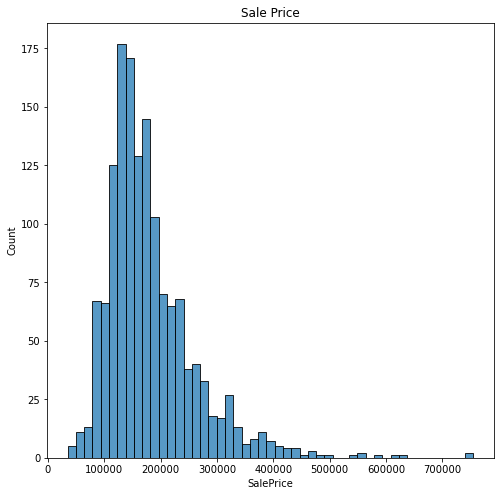

In [16]:
plt.subplots(figsize = (8,8))
plt.title("Sale Price")
sns.histplot(x = "SalePrice", data =train)

Observations:
    
**We have a right-skewed histogram indicating outliers**, we can solve this with a log transformation

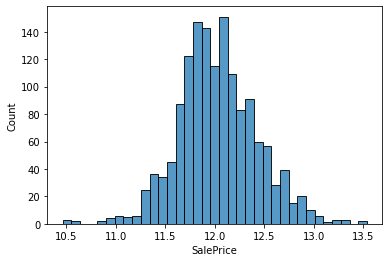

In [17]:
sns.histplot(np.log(train.SalePrice));

### MasVnrArea

In [18]:
train[train.MasVnrArea.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,A_1stFlrSF,A_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,A_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,Na,Na,Na,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,Na,Na,Na,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Na,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,Na,Na,Na,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Na,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,Na,Na,Na,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Na,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Na,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,Na,Na,Na,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Na,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,Na,Na,Na,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,Na,Na,Na,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,Na,Na,Na,0,3,2008,WD,Normal,237000


Best choice seems to be use KNN imputer after

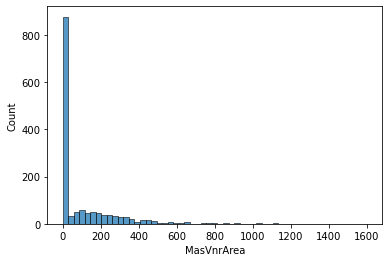

In [19]:
sns.histplot(train.MasVnrArea);

### LotFrontage : Linear feet of street connected to property

In [20]:
train.LotFrontage.isna().sum()

259

In [21]:
train.LotFrontage.min()

21.0

In [22]:
train[train.LotFrontage.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,A_1stFlrSF,A_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,A_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,Na,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Na,Na,Shed,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,Na,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,Na,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,Na,Na,Na,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,Na,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,Na,GdWo,Na,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,Na,Na,Shed,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,Na,MnPrv,Na,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,Na,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,Na,Na,Na,0,4,2007,WD,Normal,182900
1431,120,RL,NaN,4928,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,Na,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,Na,Na,Na,0,10,2009,WD,Normal,143750
1441,120,RM,NaN,4426,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,Na,Na,Na,0,5,2008,WD,Normal,149300
1443,30,RL,NaN,8854,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

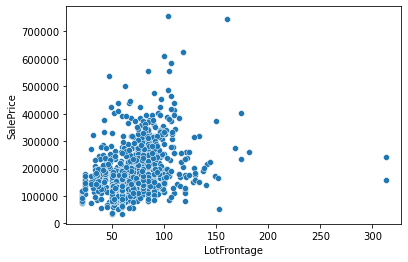

In [23]:
sns.scatterplot(x = "LotFrontage", y = "SalePrice", data =train)

In [24]:
# dropping some outliers
train = train[train.LotFrontage < 200]

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

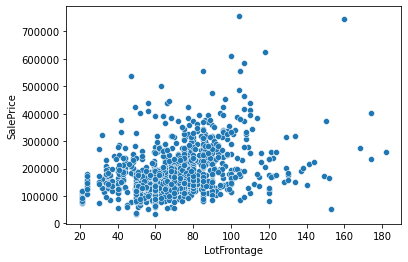

In [25]:
sns.scatterplot(x = "LotFrontage", y = "SalePrice", data =train)

Since there is not 0 value, we may assume the Nan values as 0.

In [26]:
idx = train[train.LotFrontage.isna()].index
train["LotFrontage"][idx] = 0
idx = test[test.LotFrontage.isna()].index
test["LotFrontage"][idx] = 0

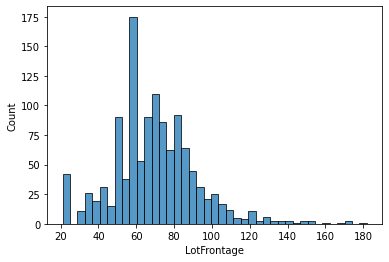

In [27]:
sns.histplot(train.LotFrontage);

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imp = KNNImputer()
test[["GarageYrBlt","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageCars","GarageArea","BsmtFullBath","BsmtHalfBath","MasVnrArea"]] = imp.fit_transform(test[["GarageYrBlt","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageCars","GarageArea","BsmtFullBath","BsmtHalfBath","MasVnrArea"]])

In [30]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Id,1459,0,1459,int64,1461,2190.0,1461,1825.5,2190.0,2554.5,2919,421.321334,0.0,-1.2
MSSubClass,1459,0,16,int64,20,57.378341,20,20.0,50.0,70.0,190,42.74688,1.34669,1.348968
LotArea,1459,0,1106,int64,9600,9819.161069,1470,7391.0,9399.0,11517.5,56600,4955.517327,3.115217,20.746549
OverallQual,1459,0,10,int64,5,6.078821,1,5.0,6.0,7.0,10,1.436812,0.181196,0.037641
OverallCond,1459,0,9,int64,5,5.553804,1,5.0,5.0,6.0,9,1.11374,0.449165,1.851819
YearBuilt,1459,0,106,int64,2005,1971.357779,1879,1953.0,1973.0,2001.0,2010,30.390071,-0.587657,-0.579321
YearRemodAdd,1459,0,61,int64,1950,1983.662783,1950,1963.0,1992.0,2004.0,2010,21.130467,-0.399906,-1.412586
A_1stFlrSF,1459,0,789,int64,864,1156.534613,407,873.5,1079.0,1382.5,5095,398.16582,1.558195,8.053863
A_2ndFlrSF,1459,0,407,int64,0,325.967786,0,0.0,0.0,676.0,1862,420.610226,0.912883,-0.275441
LowQualFinSF,1459,0,15,int64,0,3.543523,0,0.0,0.0,0.0,1064,44.043251,16.167254,308.676907


In [31]:
imp = KNNImputer()
train[["MasVnrArea","GarageYrBlt"]] = imp.fit_transform(train[["MasVnrArea","GarageYrBlt"]])

In [32]:
ed.unistats(train)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MSSubClass,1199,0,15,int64,20,57.226856,20,20.0,50.0,70.0,190,43.12892,1.425095,1.547786
LotArea,1199,0,867,int64,7200,9891.954128,1300,7417.5,9250.0,11241.5,215245,7759.314333,16.568582,414.910389
OverallQual,1199,0,10,int64,5,6.118432,1,5.0,6.0,7.0,10,1.415742,0.23893,-0.059018
OverallCond,1199,0,8,int64,5,5.561301,2,5.0,5.0,6.0,9,1.094547,0.719337,1.046485
YearBuilt,1199,0,112,int64,2006,1970.557965,1872,1950.0,1972.0,2003.0,2010,31.756951,-0.567972,-0.626211
YearRemodAdd,1199,0,61,int64,1950,1985.152627,1950,1965.5,1995.0,2004.0,2010,21.194998,-0.526273,-1.302375
BsmtFinSF1,1199,0,538,int64,0,422.713928,0,0.0,351.0,690.0,2260,439.848427,0.9012,0.2531
BsmtFinSF2,1199,0,110,int64,0,43.04754,0,0.0,0.0,0.0,1474,154.612382,4.460727,22.607772
BsmtUnfSF,1199,0,700,int64,0,589.806505,0,245.5,506.0,833.0,2336,448.887714,0.86306,0.344937
TotalBsmtSF,1199,0,641,int64,0,1055.567973,0,784.0,990.0,1307.5,3206,424.051443,0.542538,1.685741


After these process, we have non missing data on numerical columns. And very few in the object columns.

## Feature Engineering and More EDA

In [34]:
#Sorting the categorical variables relation to the response variable
ed.anova(train, "SalePrice")

,F_stat,p_value~
ExterQual,432.088915,0.000000
KitchenQual,373.076237,0.000000
BsmtQual,302.449572,0.000000
GarageFinish,202.224973,0.000000
FireplaceQu,105.070475,0.000000
Foundation,94.863137,0.000000
CentralAir,84.194928,0.000000
HeatingQC,83.155141,0.000000
GarageType,70.227549,0.000000
Neighborhood,63.959604,0.000000


Here we observe the relations between categorical features and the response

### MSSubClass

In [36]:
train.MSSubClass.value_counts()

20     436
60     229
50     128
120     67
30      63
70      55
160     55
90      47
80      38
190     27
75      15
85      14
45      12
180     10
40       3
Name: MSSubClass, dtype: int64

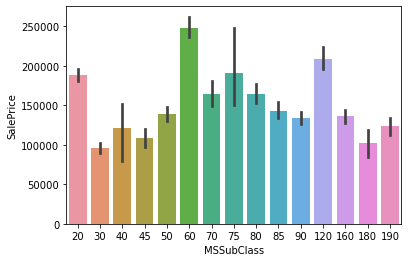

In [37]:
sns.barplot(x = "MSSubClass", y="SalePrice", data = train);

### YearBuilt

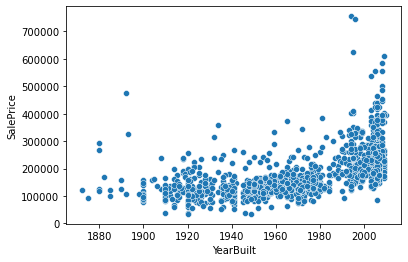

In [38]:
sns.scatterplot(x = "YearBuilt", y = "SalePrice", data = train);

I would like to create a new feature for the year column. As new and old.

In [39]:
train["New"] = [1 if i > 1940 else 0 for i in train.YearBuilt]
test["New"] = [1 if i > 1940 else 0 for i in test.YearBuilt]

### LotArea

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

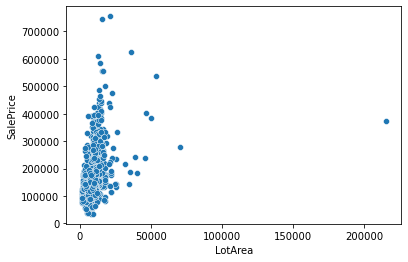

In [40]:
sns.scatterplot(x = "LotArea", y = "SalePrice", data = train)

In [41]:
#Dropping some outlier values
train = train[train.LotArea <= 100000]

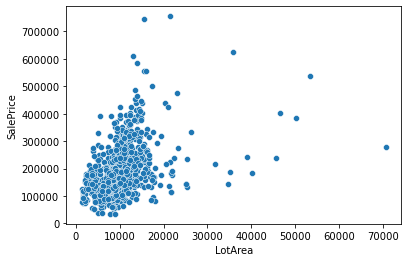

In [42]:
sns.scatterplot(x = "LotArea", y = "SalePrice", data = train);

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

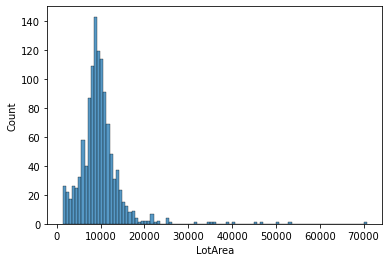

In [44]:
sns.histplot(train.LotArea)

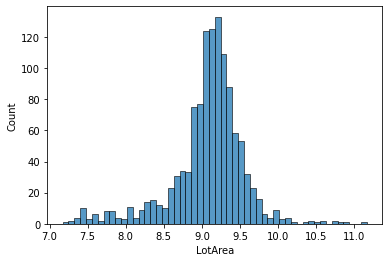

In [45]:
sns.histplot(np.log(train.LotArea));

In [46]:
#Applying log tranformation to get rid of skewness
train.LotArea = np.log(train.LotArea)
test.LotArea = np.log(test.LotArea)

### Street

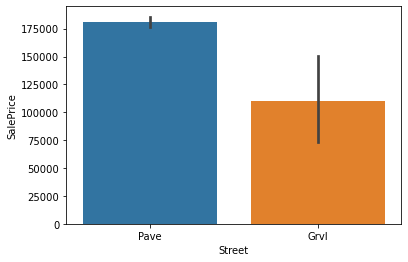

In [47]:
sns.barplot(x = "Street", y="SalePrice", data =train);

### Alley

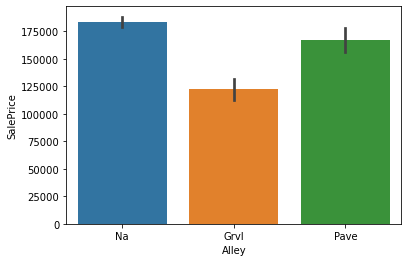

In [48]:
sns.barplot(x = "Alley", y = "SalePrice", data =train);

In [49]:
#Creating another binary variable for Alley
train["Alley_binary"] = [1 if i != "Na" else 0 for i in train.Alley]
test["Alley_binary"] = [1 if i != "Na" else 0 for i in test.Alley]

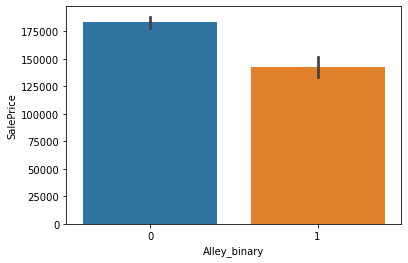

In [50]:
sns.barplot(x = "Alley_binary", y = "SalePrice", data = train);

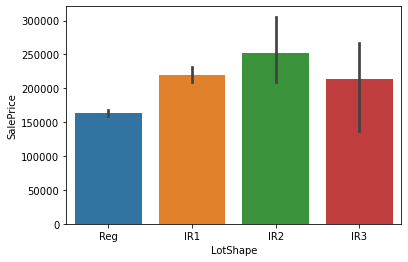

In [53]:
sns.barplot(x = "LotShape", y = "SalePrice", data  =train);

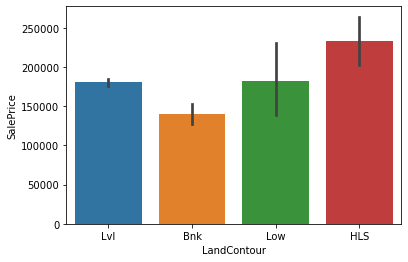

In [54]:
sns.barplot(x = "LandContour", y = "SalePrice", data = train);

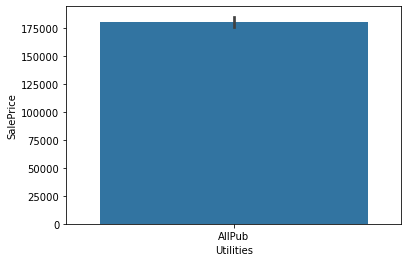

In [55]:
sns.barplot(x = "Utilities", y = "SalePrice", data = train);

In [61]:
test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [62]:
train.LotConfig.value_counts()

Inside     916
Corner     200
CulDSac     45
FR2         33
FR3          4
Name: LotConfig, dtype: int64

In [63]:
test.LotConfig.value_counts()

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

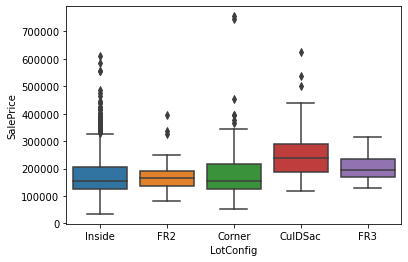

In [65]:
sns.boxplot(x = "LotConfig", y ="SalePrice", data = train);

In [66]:
train.LandSlope.value_counts()

Gtl    1147
Mod      47
Sev       4
Name: LandSlope, dtype: int64

In [67]:
test.LandSlope.value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

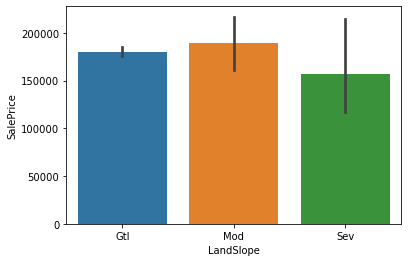

In [68]:
sns.barplot(x = "LandSlope", y = "SalePrice", data = train);

In [69]:
train.Neighborhood.value_counts()

NAmes      185
CollgCr    126
OldTown    109
Edwards     91
Somerst     78
NridgHt     76
BrkSide     51
SawyerW     50
Gilbert     49
Sawyer      48
NWAmes      45
Crawfor     41
Mitchel     36
IDOTRR      34
NoRidge     33
Timber      29
SWISU       23
StoneBr     20
BrDale      16
MeadowV     15
Blmngtn     14
ClearCr     13
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

In [70]:
test.Neighborhood.value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

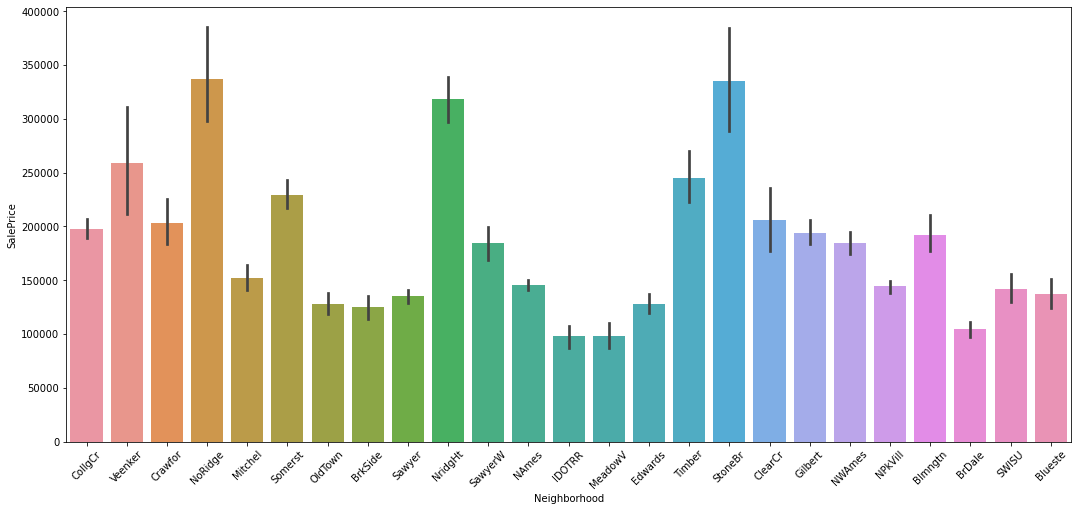

In [71]:
plt.figure(figsize = (18,8))
plt.xticks(rotation = 45)
sns.barplot(x = "Neighborhood", y = "SalePrice", data = train,);

Let's group the neighborhoods. 
<br>
**Rich** : NoRidge, NridgHt, StoneBr, Timber
<br>
**Moderate** : Veenker, Somerst, SawyerW, ClearCr, Blmngtn, Gilbert, NWAmes, Crawfor, CollgCr
<br>
**Poor** : Left ones

In [72]:
train["SocioEcon"] = np.nan
Rich = ["NoRidge", "NridgHt", "StoneBr", "Timber"]
Moderate = ["Veenker", "Somerst", "SawyerW", "ClearCr", "Blmngtn", "Gilbert", "NWAmes", "Crawfor", "CollgCr"]
idx = train[train.Neighborhood.isin(Rich)].index
idx2 = train[train.Neighborhood.isin(Moderate)].index
train["SocioEcon"][idx] = "Rich"
train["SocioEcon"][idx2] = "Moderate"
train.SocioEcon.fillna("Low", inplace=True)

In [73]:
test["SocioEcon"] = np.nan
Rich = ["NoRidge", "NridgHt", "StoneBr", "Timber"]
Moderate = ["Veenker", "Somerst", "SawyerW", "ClearCr", "Blmngtn", "Gilbert", "NWAmes", "Crawfor", "CollgCr"]
idx = test[test.Neighborhood.isin(Rich)].index
idx2 = test[test.Neighborhood.isin(Moderate)].index
test["SocioEcon"][idx] = "Rich"
test["SocioEcon"][idx2] = "Moderate"
test.SocioEcon.fillna("Low", inplace=True)

<AxesSubplot:xlabel='SocioEcon', ylabel='SalePrice'>

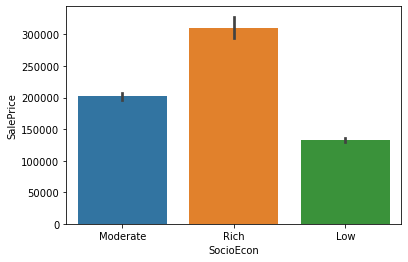

In [74]:
sns.barplot(x = "SocioEcon", y = "SalePrice", data = train)

Seems good.

In [75]:
train.Condition1.value_counts()

Norm      1036
Feedr       66
Artery      46
RRAn        24
RRAe         9
PosN         9
RRNn         4
PosA         3
RRNe         1
Name: Condition1, dtype: int64

In [76]:
test.Condition1.value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

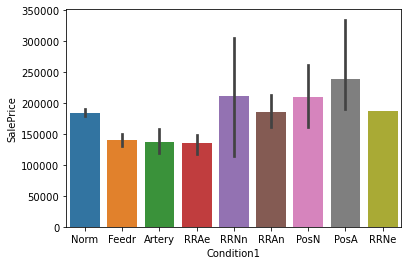

In [77]:
sns.barplot(x= "Condition1", y = "SalePrice", data = train)

In [78]:
train.Condition2.value_counts()

Norm      1185
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
Name: Condition2, dtype: int64

In [79]:
#Finding the two conditioned houses.
train[train.Condition2 != "Norm"]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,A_1stFlrSF,A_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,A_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,New,Alley_binary,SocioEcon
9,190,RL,50.0,8.911934,Pave,Na,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,Na,Na,Na,0,1,2008,WD,Normal,118000,0,0,Low
29,30,RM,60.0,8.752107,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,Na,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,Na,Na,Na,0,5,2008,WD,Normal,68500,0,0,Low
63,70,RM,50.0,9.239899,Pave,Na,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0,1710,0,0,2,0,3,1,TA,9,Typ,0,Na,Detchd,1990.0,Unf,2,480,TA,TA,Y,12,11,64,0,0,0,Na,GdPrv,Na,0,4,2010,WD,Normal,140000,0,0,Low
88,50,C (all),105.0,9.044286,Pave,Na,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,Na,Na,1951.8,Na,0,0,Na,Na,N,0,0,156,0,0,0,Na,MnPrv,Na,0,10,2009,ConLD,Abnorml,85000,0,0,Low
184,50,RL,92.0,8.914357,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1.5Fin,5,8,1908,1991,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,Fa,TA,No,Unf,0,Unf,0,504,504,GasA,Gd,Y,SBrkr,936,316,0,1252,0,0,1,0,3,1,TA,5,Typ,0,Na,Attchd,1986.0,Unf,2,576,TA,TA,Y,104,0,0,0,0,0,Na,MnPrv,Na,0,6,2006,WD,Normal,127000,0,0,Low
523,60,RL,130.0,10.598982,Pave,Na,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,Na,Na,Na,0,10,2007,New,Partial,184750,1,0,Low
531,70,RM,60.0,8.725020,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,RRNn,Feedr,1Fam,2Story,6,8,1920,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,Mn,Unf,0,Unf,0,611,611,GasA,Ex,Y,SBrkr,751,611,0,1362,0,0,2,0,3,1,TA,6,Typ,0,Na,Detchd,1920.0,Fin,2,502,TA,Fa,Y,0,0,84,0,0,0,Na,Na,Na,0,6,2008,WD,Normal,128000,0,0,Low
548,20,RM,49.0,9.016149,Pave,Na,IR1,HLS,AllPub,Inside,Gtl,OldTown,Feedr,RRNn,1Fam,1Story,5,7,1955,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,LwQ,180,Rec,645,0,825,GasA,TA,Y,SBrkr,825,0,0,825,1,0,1,0,2,1,TA,4,Typ,0,Na,Detchd,1963.0,RFn,2,720,TA,TA,Y,140,50,0,0,0,0,Na,MnPrv,Na,0,6,2008,WD,Normal,125000,1,0,Low
583,75,RM,75.0,9.510445,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,Na,Na,Na,0,7,2008,WD,Normal,325000,0,0,Low
589,40,RM,50.0,9.116030,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompSh

In [80]:
#Creating a variable for 2 conditioned houses
train["two_cond"] = [1 if i != "Norm" else 0 for i in train.Condition2]
test["two_cond"] = [1 if i != "Norm" else 0 for i in test.Condition2]

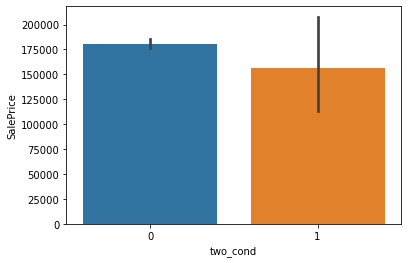

In [81]:
sns.barplot(x = "two_cond",y="SalePrice", data =train);

We can see that houses with 2 conditions tend to have lower saleprice

In [82]:
train.BldgType.value_counts()

1Fam      991
TwnhsE     92
Duplex     47
Twnhs      40
2fmCon     28
Name: BldgType, dtype: int64

In [83]:
test.BldgType.value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

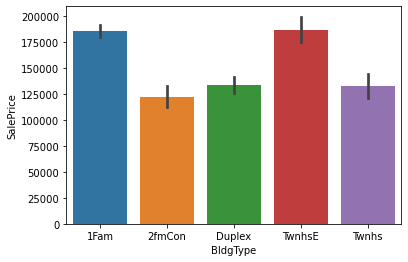

In [84]:
sns.barplot(x = "BldgType", y = "SalePrice", data =train);

In [85]:
# Adding a variable for remodeled houses after being constructed
train["Remodeled"] = 1
test["Remodeled"] = 1
idx = train[train.YearBuilt == train.YearRemodAdd].index
idx2 = test[test.YearBuilt == test.YearRemodAdd].index
train["Remodeled"][idx] = 0
test["Remodeled"][idx2] = 0

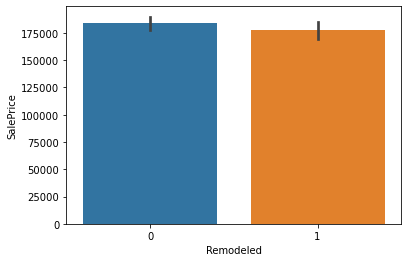

In [86]:
sns.barplot(x = "Remodeled", y="SalePrice", data = train);

In [87]:
train.Electrical.value_counts()

SBrkr    1088
FuseA      80
FuseF      25
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [88]:
test.Electrical.value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

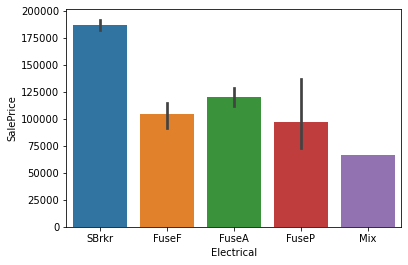

In [89]:
sns.barplot(x = "Electrical", y="SalePrice", data =train)

In [90]:
#Dropping another outlier since it also does not appear in test set
train[train.Electrical == "Mix"]
train.drop(index=398, inplace=True)

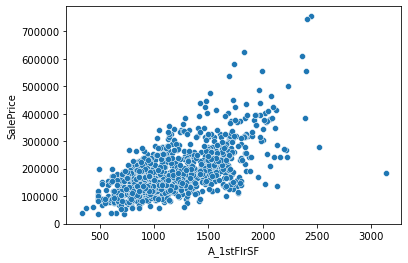

In [91]:
sns.scatterplot(x = "A_1stFlrSF", y= "SalePrice", data = train);

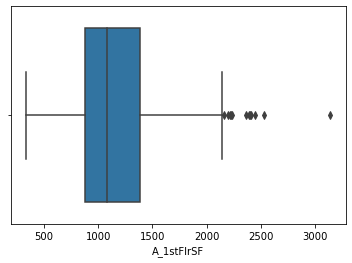

In [92]:
sns.boxplot(train.A_1stFlrSF);

<AxesSubplot:xlabel='A_1stFlrSF', ylabel='Count'>

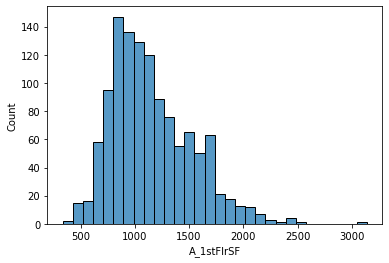

In [93]:
sns.histplot(train.A_1stFlrSF)

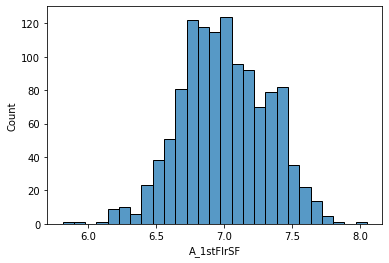

In [94]:
#Another right skewed variable which we can solve it by log transformation
sns.histplot(np.log(train.A_1stFlrSF));

In [95]:
train.A_1stFlrSF = np.log(train.A_1stFlrSF)
test.A_1stFlrSF = np.log(test.A_1stFlrSF)

<AxesSubplot:xlabel='A_2ndFlrSF', ylabel='Count'>

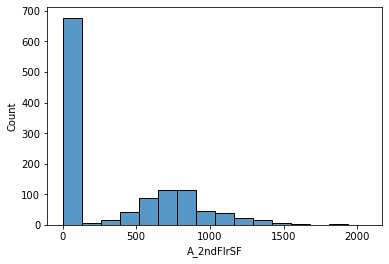

In [96]:
sns.histplot(train.A_2ndFlrSF)

In [97]:
#We may a create a column for those houses having 2 floors
train["SecondFloor"] = [1 if i > 0 else 0 for i in train.A_2ndFlrSF]
test["SecondFloor"] = [1 if i > 0 else 0 for i in test.A_2ndFlrSF]

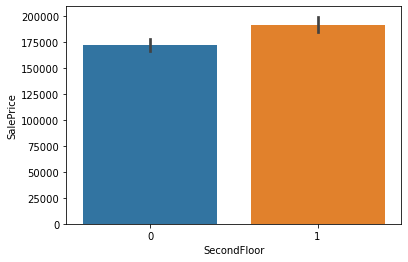

In [98]:
sns.barplot(x = "SecondFloor", y="SalePrice", data = train);

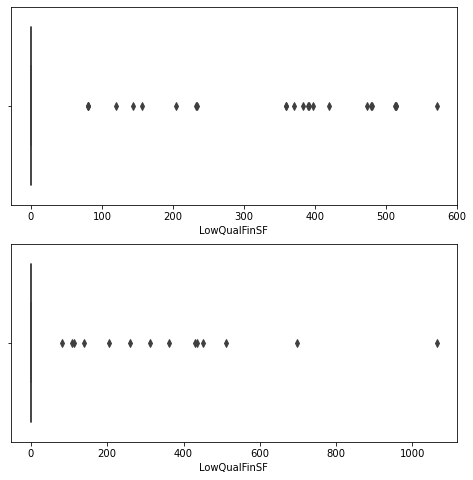

In [99]:
fid , ax = plt.subplots(2, figsize=(8,8))
sns.boxplot(x = "LowQualFinSF", data = train, ax=ax[0])
sns.boxplot(x = "LowQualFinSF", data = test, ax=ax[1]);

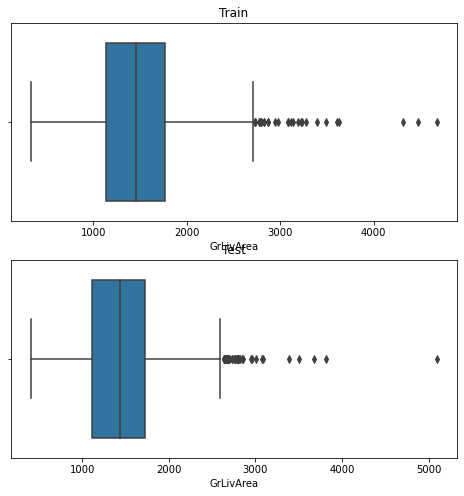

In [100]:
fig , ax = plt.subplots(2, figsize=(8,8))
ax[0].set_title("Train")
sns.boxplot(x = "GrLivArea", data = train, ax=ax[0])
ax[1].set_title("Test")
sns.boxplot(x = "GrLivArea", data = test, ax=ax[1]);

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

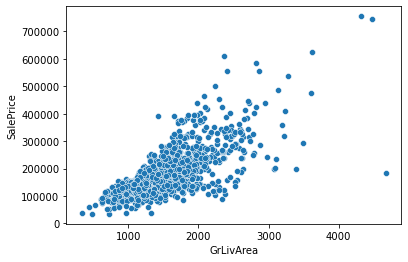

In [101]:
sns.scatterplot(x = "GrLivArea", y="SalePrice",data=train)

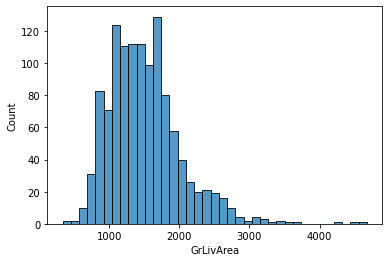

In [102]:
sns.histplot(train.GrLivArea);

In [103]:
#Another log tranformation
train.GrLivArea = np.log(train.GrLivArea)
test.GrLivArea = np.log(test.GrLivArea)

In [104]:
train.BsmtFullBath.value_counts()

0    722
1    463
2     11
3      1
Name: BsmtFullBath, dtype: int64

In [105]:
test.BsmtFullBath.value_counts()

0.0    850
1.0    584
2.0     23
3.0      1
0.6      1
Name: BsmtFullBath, dtype: int64

In [106]:
# How could a number be 0.6, changing into 1
test[test.BsmtFullBath == 0.6]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,A_1stFlrSF,A_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,A_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,New,Alley_binary,SocioEcon,two_cond,Remodeled,SecondFloor
660,2121,20,RM,99.0,8.689464,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,Na,Na,Na,Na,456.4,Na,105.6,276.6,838.6,GasA,TA,Y,FuseA,6.79794,0,0,6.79794,0.6,0.0,1,0,2,1,TA,4,Typ,0,Na,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,Na,MnPrv,Na,0,4,2008,ConLD,Abnorml,1,0,Low,0,1,0


In [107]:
test.BsmtFullBath[660] = 1

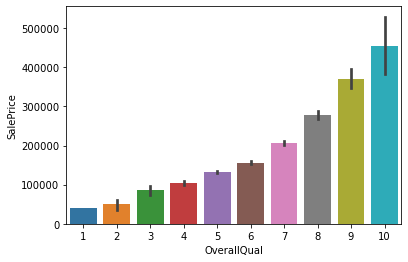

In [108]:
sns.barplot(x = "OverallQual",y = "SalePrice", data = train);

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

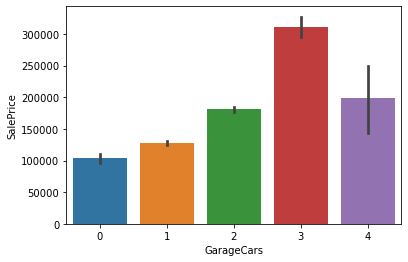

In [109]:
sns.barplot(x = "GarageCars", y="SalePrice", data =train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

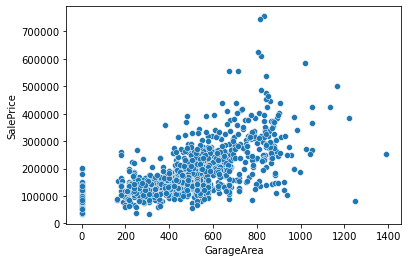

In [110]:
sns.scatterplot(x = "GarageArea", y="SalePrice", data =train)

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

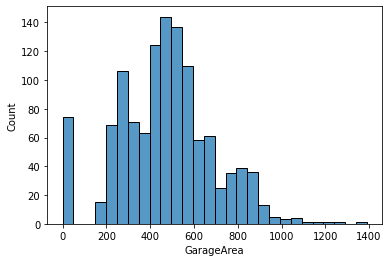

In [111]:
sns.histplot(x = "GarageArea", data =train)

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

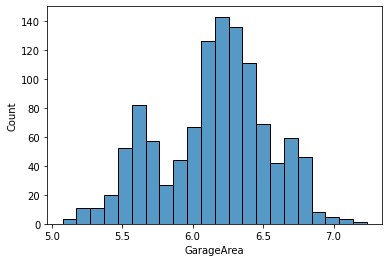

In [113]:
#Since there are 0 values we cannot use log tranformation!
sns.histplot(np.log(train.GarageArea))

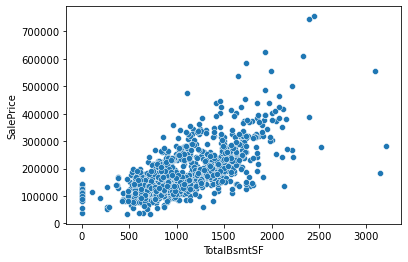

In [114]:
sns.scatterplot(x = "TotalBsmtSF", y="SalePrice", data=train);

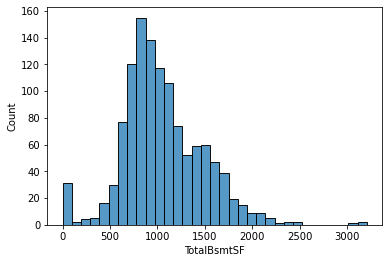

In [115]:
sns.histplot(x = "TotalBsmtSF", data=train);

In [116]:
train = train[train.TotalBsmtSF < 2600]

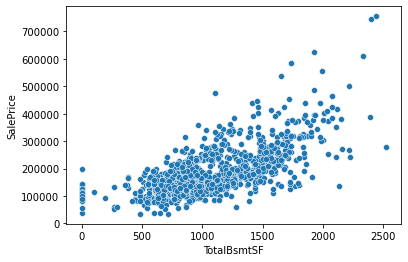

In [117]:
sns.scatterplot(x = "TotalBsmtSF", y="SalePrice", data=train);

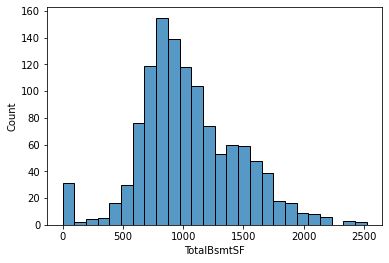

In [118]:
sns.histplot(x = "TotalBsmtSF", data=train);

In [119]:
train.FullBath.value_counts()

2    624
1    536
3     28
0      6
Name: FullBath, dtype: int64

In [120]:
test.FullBath.value_counts()

2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64

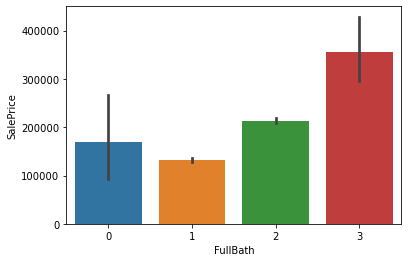

In [121]:
sns.barplot(x = "FullBath", y="SalePrice", data = train);

In [122]:
train.TotRmsAbvGrd.value_counts()

6     337
7     256
5     230
8     161
4      75
9      60
10     38
11     14
3      12
12      9
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [123]:
test.TotRmsAbvGrd.value_counts()

6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64

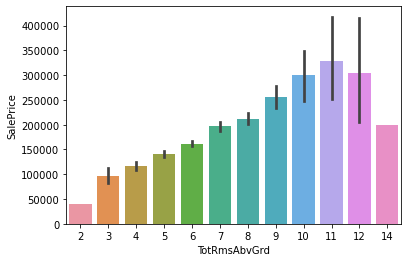

In [124]:
sns.barplot(x = "TotRmsAbvGrd", y="SalePrice", data = train);
#Maybe a second degree variable can be used

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

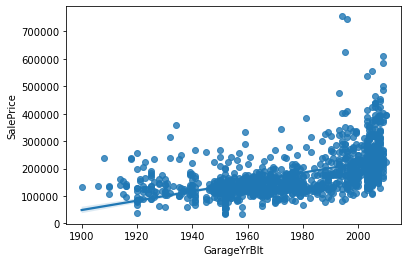

In [125]:
sns.regplot(x = "GarageYrBlt", y="SalePrice", data = train)
#Another second degree variable can be used

In [126]:
train.Fireplaces.value_counts()

0    599
1    516
2     76
3      3
Name: Fireplaces, dtype: int64

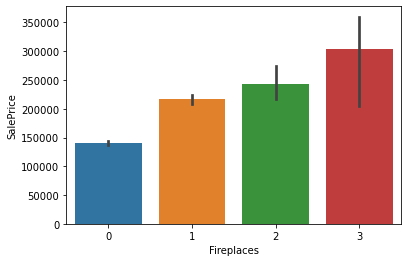

In [127]:
sns.barplot(x = "Fireplaces", y="SalePrice", data = train);

In [128]:
train["Fireplace_exist"] = [1 if i > 0 else 0 for i in train.Fireplaces]
test["Fireplace_exist"] = [1 if i > 0 else 0 for i in test.Fireplaces]

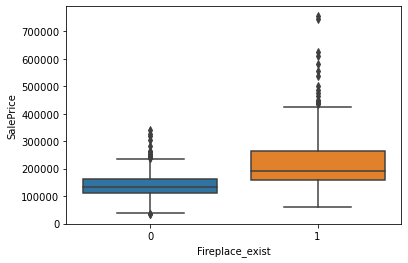

In [129]:
sns.boxplot(x = "Fireplace_exist", y="SalePrice", data = train);

In [130]:
train.ExterQual.value_counts()

TA    734
Gd    403
Ex     44
Fa     13
Name: ExterQual, dtype: int64

In [131]:
test.ExterQual.value_counts()

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64

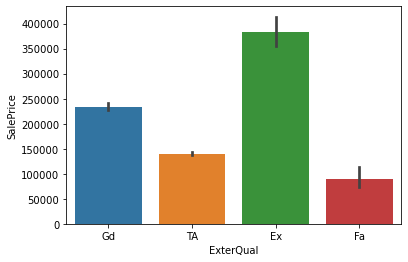

In [132]:
sns.barplot(x = "ExterQual", y="SalePrice", data=train);

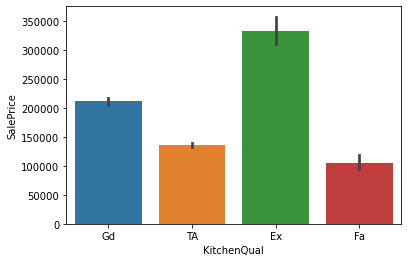

In [133]:
sns.barplot(x = "KitchenQual", y="SalePrice", data=train);

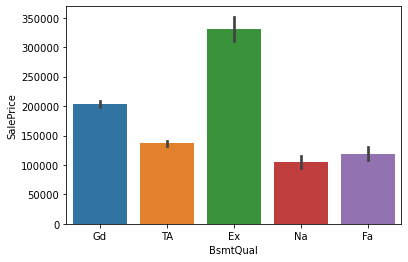

In [134]:
sns.barplot(x = "BsmtQual", y ="SalePrice",data=train);

In [135]:
train["Basement"] = [0 if i == "Na" else 1 for i in train.BsmtQual]
test["Basement"] = [0 if i == "Na" else 1 for i in test.BsmtQual]

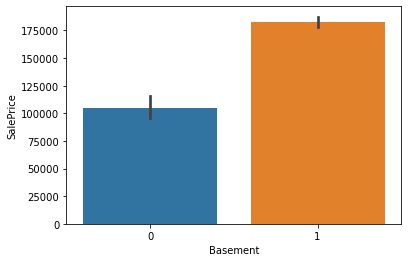

In [136]:
sns.barplot(x = "Basement", y="SalePrice", data=train);

In [137]:
train.GarageFinish.value_counts()

Unf    504
RFn    337
Fin    279
Na      74
Name: GarageFinish, dtype: int64

In [138]:
test.GarageFinish.value_counts()

Unf    625
RFn    389
Fin    367
Na      78
Name: GarageFinish, dtype: int64

In [139]:
# Another binary variable for houses that has a garage
train["Garage"] = [1 if i > 0 else 0 for i in train.GarageArea]
test["Garage"] = [1 if i > 0 else 0 for i in test.GarageArea]

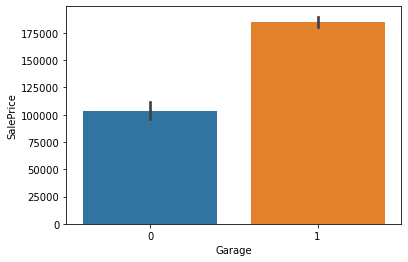

In [140]:
sns.barplot(x = "Garage", y = "SalePrice", data=train);

In [141]:
train.Foundation.value_counts()

PConc     538
CBlock    492
BrkTil    137
Slab       19
Stone       6
Wood        2
Name: Foundation, dtype: int64

In [142]:
test.Foundation.value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [143]:
train.CentralAir.value_counts()

Y    1106
N      88
Name: CentralAir, dtype: int64

In [144]:
# Changing the column from yes-no to 1-0
train["CentralAir"] = [1 if i == "Y" else 0 for i in train.CentralAir]
test["CentralAir"] = [1 if i == "Y" else 0 for i in test.CentralAir]

In [145]:
ed.unistats(train)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MSSubClass,1194,0,15,int64,20,57.340871,20,20.0,50.0,70.0,190,43.171448,1.420742,1.532312
OverallQual,1194,0,10,int64,5,6.110553,1,5.0,6.0,7.0,10,1.408097,0.223714,-0.077409
OverallCond,1194,0,8,int64,5,5.566164,2,5.0,5.0,6.0,9,1.091487,0.744683,1.000231
YearBuilt,1194,0,112,int64,2006,1970.515913,1872,1950.0,1972.0,2003.0,2010,31.739407,-0.567469,-0.623388
YearRemodAdd,1194,0,61,int64,1950,1985.144891,1950,1966.0,1995.0,2004.0,2010,21.179272,-0.5267,-1.3008
BsmtFinSF1,1194,0,534,int64,0,419.134841,0,0.0,350.5,688.25,2188,434.515743,0.866867,0.095493
BsmtFinSF2,1194,0,108,int64,0,41.688442,0,0.0,0.0,0.0,1474,152.081358,4.572887,23.908743
BsmtUnfSF,1194,0,697,int64,0,588.666667,0,245.25,506.0,832.0,2336,448.382657,0.868029,0.359094
TotalBsmtSF,1194,0,637,int64,0,1049.48995,0,784.0,989.0,1304.0,2524,410.555856,0.296535,0.628613
CentralAir,1194,0,2,int64,1,0.926298,0,1.0,1.0,1.0,1,0.261395,-3.267195,8.689113


In [146]:
ed.unistats(test)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Id,1459,0,1459,int64,1461,2190.0,1461,1825.5,2190.0,2554.5,2919,421.321334,0.0,-1.2
MSSubClass,1459,0,16,int64,20,57.378341,20,20.0,50.0,70.0,190,42.74688,1.34669,1.348968
OverallQual,1459,0,10,int64,5,6.078821,1,5.0,6.0,7.0,10,1.436812,0.181196,0.037641
OverallCond,1459,0,9,int64,5,5.553804,1,5.0,5.0,6.0,9,1.11374,0.449165,1.851819
YearBuilt,1459,0,106,int64,2005,1971.357779,1879,1953.0,1973.0,2001.0,2010,30.390071,-0.587657,-0.579321
YearRemodAdd,1459,0,61,int64,1950,1983.662783,1950,1963.0,1992.0,2004.0,2010,21.130467,-0.399906,-1.412586
CentralAir,1459,0,2,int64,1,0.930775,0,1.0,1.0,1.0,1,0.253924,-3.397595,9.556748
A_2ndFlrSF,1459,0,407,int64,0,325.967786,0,0.0,0.0,676.0,1862,420.610226,0.912883,-0.275441
LowQualFinSF,1459,0,15,int64,0,3.543523,0,0.0,0.0,0.0,1064,44.043251,16.167254,308.676907
FullBath,1459,0,5,int64,2,1.570939,0,1.0,2.0,2.0,4,0.55519,0.295839,-0.232339


In [147]:
# Applyinh the saleprice log tranformation at the end since we used it for visualization
train.SalePrice = np.log(train.SalePrice)

# Modelling

In [161]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from statsmodels.api import OLS

In [190]:
# Setting the cross validation method at first
cv = ShuffleSplit(n_splits=10, test_size=0.2)

In [149]:
# Creating the datasets for modelling
X = train.copy()
test_sub = test.copy()

In [150]:
test_sub.drop("Id", inplace=True, axis = 1)

In [151]:
#Creating dummy variables for categorical variables
for col in X:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X = X.join(pd.get_dummies(X[col], prefix = col, drop_first = True))
for col in test_sub:
    if not pd.api.types.is_numeric_dtype(test_sub[col]):
        test_sub = test_sub.join(pd.get_dummies(test_sub[col], prefix = col, drop_first = True))

In [152]:
#Shortcut to dropping object type columns
x = X.select_dtypes(np.number)
test_sub = test_sub.select_dtypes(np.number)

In [153]:
test_features = list(X.columns)
train_features = list(test_sub.columns)

In [154]:
# Finding common columns in the both train and test dataset
common_features = []
for i in test_features:
    for j in train_features:
        if i == j:
            common_features.append(i)
        else:
            pass

In [155]:
test_sub = test_sub[common_features]

In [156]:
common_features.append("SalePrice")

In [157]:
x = x[common_features]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(x.drop("SalePrice", axis = 1), x.SalePrice, test_size=0.2)

### LinearRegression

In [180]:
# Creating a pipeline that firstly scales the data then fits
pipe = make_pipeline(RobustScaler(), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [182]:
r2_score(y_test, pipe.predict(X_test))

-68884924043420.945

In [183]:
# Since r2 metric doesn't mean much we can use another metric
mean_absolute_error(y_test, pipe.predict(X_test))

305822.9046406863

### Feature Selection

In [163]:
# Defining a funciton for Mallow's Cp to use in forward stepwise subset selection
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    "Returns the Mallow's Cp stat"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y-Yhat)**2)
    return -(RSS + 2 * p * sigma2)/n

In [164]:
X,y = X_train, y_train
sigma2 = OLS(y,X).fit().scale

In [165]:
from functools import partial
neg_Cp = partial(nCp,sigma2)

In [166]:
from sklearn.feature_selection import SequentialFeatureSelector

In [175]:
pipe_frwrd =  make_pipeline(RobustScaler(),LinearRegression())
pipe_frwrd.fit(X,y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [168]:
# Warning this is a very greedy approach that fits all the variables every time so takes long time !!!
sfs_forward = SequentialFeatureSelector(pipe_frwrd, 
                                        scoring=neg_Cp, 
                                        n_features_to_select="warn", 
                                        direction="forward").fit(X,y)

In [169]:
parameters = X.columns.values[sfs_forward.get_support()]

In [170]:
parameters, len(parameters)

(array(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF',
        'TotalBsmtSF', 'CentralAir', 'A_1stFlrSF', 'A_2ndFlrSF',
        'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'A_3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'New', 'Remodeled',
        'Fireplace_exist', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
        'MSZoning_RM', 'Street_Pave', 'LotShape_IR3', 'LandContour_HLS',
        'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR2',
        'LotConfig_Inside', 'LandSlope_Sev', 'Neighborhood_Blueste',
        'Neighborhood_BrDale', 'Neighborhood_BrkSide',
        'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
        'Neighborhood_Edwards', 'Neighborhood_Gilbert',
        'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
        'Neighborhood_NPkVill', 'Neighborho

In [176]:
pipe_frwrd.fit(X[parameters],y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [179]:
r2_score(y_test,pipe_frwrd.predict(X_test[parameters]))

0.9181694621752328

Feature seleciton definitely helped us improving the r2 of the validation set.

### Ridge and  Lasso

In [187]:
from sklearn import linear_model

In [188]:
lambdas = 10**np.linspace(8, -2, 100) / y.std()

In [191]:
reg = linear_model.RidgeCV(alphas=lambdas,cv = cv)

In [203]:
pipe_ridge = make_pipeline(RobustScaler(), reg)
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([2.39983530e+08, 1.90182843e+08, 1.50716651e+08, 1.19440368e+08,
       9.46544492e+07, 7.50120323e+07, 5.94457527e+07, 4.71097424e+07,
       3.73336652e+07, 2.95862912e+07, 2.34466298e+07, 1.85810532e+07,
       1.47251669e+07, 1.16694429e+07, 9.24783394e+06, 7.32875024e+06,
       5.80790923e+06, 4.60266874e+06...
       1.99238542e+00, 1.57893138e+00, 1.25127611e+00, 9.91614921e-01,
       7.85837866e-01, 6.22763070e-01, 4.93529083e-01, 3.91113358e-01,
       3.09950647e-01, 2.45630587e-01, 1.94658040e-01, 1.54263168e-01,
       1.22250922e-01, 9.68817651e-02, 7.67771420e-02, 6.08445720e-02,
       4.82182828e-02, 3.82121645e-02, 3.02824869e-02, 2.39983530e-02]),
                         cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)))])

In [204]:
r2_score(y_test,pipe_ridge.predict(X_test))

0.9261945350088772

In [206]:
lasso_aic = make_pipeline(RobustScaler(), linear_model.LassoLarsIC(criterion="aic"))
lasso_aic.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lassolarsic', LassoLarsIC())])

In [207]:
r2_score(y_test, lasso_aic.predict(X_test))

0.9266463575905766

Lasso seems better but will submit both to Kaggle

### PCA 

In [208]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [209]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA()),
                ('linreg', LinearRegression())])
pipe.fit(X, y)
pipe.named_steps['linreg'].coef_

array([-8.14198205e-02, -9.97540539e-05, -4.23069164e-03, -3.27501091e-02,
        3.49392691e-02,  1.13691108e-02,  1.69797105e-02,  1.36827308e-02,
       -1.40028983e-03,  7.76007820e-03, -2.44693365e-03,  1.13537455e-02,
       -2.94468566e-02, -1.31496945e-02,  5.73397968e-05, -5.81597127e-03,
        1.49315752e-02, -4.58838824e-03,  4.18266266e-03,  6.65609095e-03,
       -9.23049326e-03, -8.79669328e-03,  7.56878967e-03, -2.10369395e-03,
       -6.40642390e-03,  2.16725933e-03, -9.61300106e-03,  1.11996734e-02,
        6.83218878e-03,  1.17085489e-02, -4.37959729e-03,  9.62106128e-03,
        1.61356388e-02, -5.70396995e-03,  4.89802148e-03,  6.75476176e-03,
        1.22176342e-02, -6.88157631e-03,  1.31292978e-03,  3.02471144e-03,
        5.46144404e-03, -7.10946777e-04, -1.06104053e-02, -4.16784954e-03,
       -5.65432297e-03, -7.04629517e-03, -2.51336555e-04,  4.66059084e-03,
        1.28467845e-03,  7.42823784e-03,  4.40526821e-03, -7.61912353e-03,
       -8.54382098e-03, -

In [210]:
#Using CV to choose the best number of components
param_grid = {'pca__n_components': range(1, 100)}
grid = GridSearchCV(pipe ,
                        param_grid ,
                        cv=cv ,
                        scoring='neg_mean_squared_error')
pca_model = grid.fit(X, y)

In [212]:
r2_score(y_test, pca_model.predict(X_test))

0.8917743249922513

PCA is not that useful in this case.

### Tree Based Methods

In [213]:
from ISLP.models import ModelSpec as MS
from ISLP import confusion_table
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots

from sklearn.tree import(DecisionTreeRegressor as DTR,
                        plot_tree,
                        export_text)
from sklearn.metrics import (accuracy_score,
                            log_loss)
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR 

In [214]:
#Bagging
bag_boston = RF(max_features = X_train.shape[1],
               random_state=0)
bag_boston.fit(X_train,y_train)

RandomForestRegressor(max_features=247, random_state=0)

In [215]:
r2_score(y_test, bag_boston.predict(X_test))

0.9015652062508308

In [238]:
X_train.shape[1]

247

In [216]:
#Random forest
RF_boston = RF(max_features=16,
              random_state=0).fit(X_train, y_train)

y_hat_RF = RF_boston.predict(X_test)
print(r2_score(y_test,y_hat_RF))
np.mean((y_test-y_hat_RF)**2)

0.8819538702318406


0.018976134183897802

In [217]:
#Boosting
boost_boston = GBR()
grid = GridSearchCV(boost_boston,
                   {"learning_rate" : [0.0001,0.001,0.01,0.1,1]},
                   refit = True,
                   cv = cv,
                   scoring = "r2")
grid.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [218]:
y_hat_boost = grid.predict(X_test)
r2_score(y_test, y_hat_boost)

0.91669253921438

In [220]:
y_pred = np.exp(pipe_ridge.predict(test_sub))
sub_df = pd.DataFrame(data = y_pred, columns = ["SalePrice"])
sub_df["Id"] = np.arange(1461,2920)
sub_df = sub_df[["Id","SalePrice"]]
sub_df.to_csv("submission.csv", index = False)
sub_df.head(5)

,Id,SalePrice
0,1461,113367.296822
1,1462,106960.267160
2,1463,185616.144528
3,1464,208369.343636
4,1465,192094.681378


So the best model seems to be between Lasso and Ridge. I am choosing the Ridge as the submission.